In [1]:
from random import random
import numpy as np
import matplotlib.pyplot as plt


In [2]:
a = [[0.2, -0.2, -0.3], [0.2, 0.5, 0.3], [-0.4, -0.2, -0.3]]
a_original = [[0.8, 0.2, 0.3], [-0.2, 0.5, -0.3], [0.4, 0.2, 1.3]]
f = [3.0, -1.0, -1.0]

def monteCarlo(m, N):
    # solution 
    x = []

    # system size
    n = 3

    # N - length of Markov's chain

    h = np.zeros((n, n))
    for _ in range(n):
            h[_][_] = 1

    # вектор начальных вероятностей
    pi = []

    # матрица переходнах состояний цепи Маркова 
    p = []


    # веса состояний цепи Маркова 
    Q = np.zeros((n, N + 1))

    # m - number of Markov's implementations

    # Random
    ksi = np.zeros((n, m))


    # БСВ
    aplha = 0

    for i in range(n):
        pi.append(1.0 / n)
        p.append([])
        for j in range(n):
            p[i].append(1.0 / n)

    def get_probability_intervals(vector): 
        n = len(vector)
        result = []
        sum = 0
        result.append(0)
        for i in range (1, n + 1):
            result.append(sum + vector[i - 1])
            sum = result[i]
        return result

    def get_state(alpha, intervals): # этой функцией мы находим какое состояние будет реализоваться
        for i in range(1, len(intervals)):
            if( alpha < intervals[i]):
                return i - 1

    # Markov chain 
    i = []

    # modelling m chains        
    for j in range(m):
        alpha = random()
        intervals = get_probability_intervals(pi)
        state = get_state(alpha, intervals)
        i.append(state)

        for k in range(1, N + 1):
            alpha = random()
            i.append(get_state(alpha, intervals))

        for _ in range(n):
            Q[_][0] = h[_][i[0]] / pi[i[0]] if pi[i[0]] > 0 else 0

        for k in range(1, N + 1):
            for _ in range(n):
                Q[_][k] = Q[_][k - 1] * a[i[k - 1]][i[k]] / p[i[k - 1]][i[k]] if p[i[k - 1]][i[k]] > 0 else 0

        for k in range(N + 1):
            for _ in range(n):
                ksi[_][j] = ksi[_][j] + Q[_][k] * f[i[k]]
        i = []

    for _ in range(n):
        x.append(sum(ksi[_]) / m)
    print(x)
    return x
x = monteCarlo(5000, 1000)


[4.618467482907216, -1.0292790416708064, -2.1271848862924463]


In [3]:
python_solution = np.linalg.solve(a_original, f)
print(python_solution)

[ 4.84732824 -1.29770992 -2.0610687 ]


In [4]:
print("MSE difference between np.linalg and Monte-Carlo: ", np.square(np.subtract(python_solution, x)).mean())

MSE difference between np.linalg and Monte-Carlo:  0.04293457876283283


In [5]:
ms = [_ for _ in range(1000, 7000, 1000)]

In [6]:
answerActual = [monteCarlo(_, 1000) for _ in ms]

[4.238219666974368, -0.9588782161673688, -2.178810686914524]
[4.840666251488315, -1.3235881393356375, -2.0697976743384636]
[4.936632137407009, -1.1853013351547161, -1.5835716322747972]
[4.67149325040334, -1.5131748344404845, -1.691550168351305]
[4.661801728577458, -1.346143867170433, -2.1839888849584854]
[4.861155689575608, -1.3718044012365318, -2.2033832347585083]


In [7]:
mse_differences = [np.square(np.subtract(python_solution, x)).mean() for x in answerActual]
print(mse_differences)

[0.16656111996314513, 0.00026341971575009887, 0.08287144265747345, 0.07129567325663466, 0.01729176873920236, 0.008644872000661146]


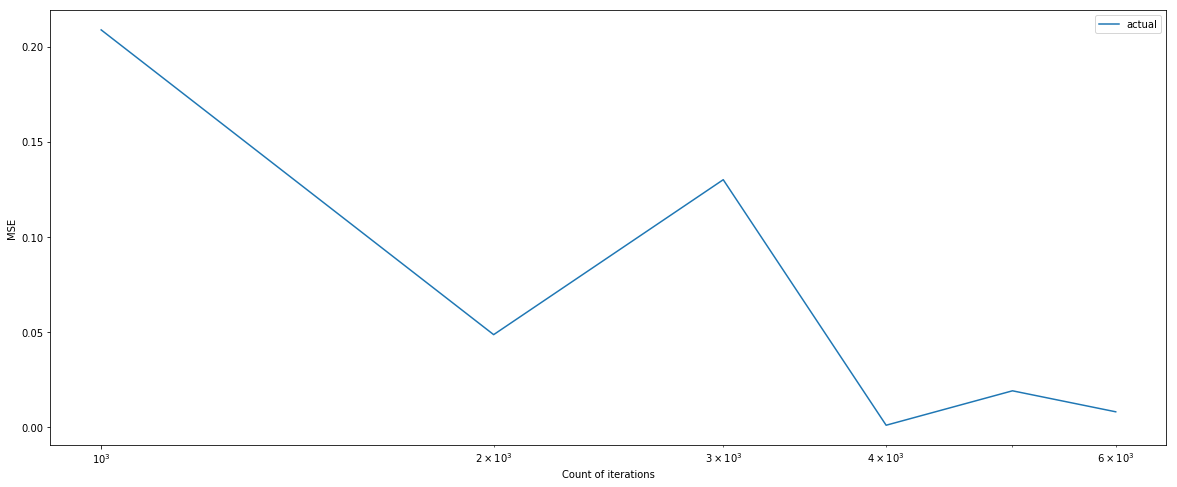

In [64]:
def getPlot(actual):
    plt.figure(figsize=(20, 8))
    plt.plot(ms, actual, label='actual')
    plt.xscale('log')
    plt.xlabel('Count of iterations')
    plt.ylabel('MSE')
    plt.legend()
    
getPlot(mse_differences)

In [68]:
Ns = [_ for _ in range(1000, 12000, 1500)]
answerActual_N = [monteCarlo(2000, _) for _ in Ns]
mse_differences_N = [np.square(np.subtract(python_solution, x)).mean() for x in answerActual_N]

[5.004539264640854, -1.472379778260819, -2.407039291605315]
[4.841666201354961, -1.8322537125385756, -1.9891324136846693]
[4.632755770328924, -1.0839160798505638, -2.052449961985297]
[4.514780605616102, -1.3851822652386925, -2.8196820859406837]
[4.449295523240455, -1.133188069596151, -2.3433783006329274]
[4.967226572289109, -1.3423691941800486, -2.3791355964340077]
[4.81299771836354, -1.8975368139650672, -1.962149883363325]
[4.793245080712418, -0.6849306013771969, -2.4742262566787896]


[0.0583068372334995, 0.0969813168575344, 0.030607812304091556, 0.231244536123948, 0.08839873226549215, 0.03917886955133552, 0.12358527202510333, 0.18304088371726743]


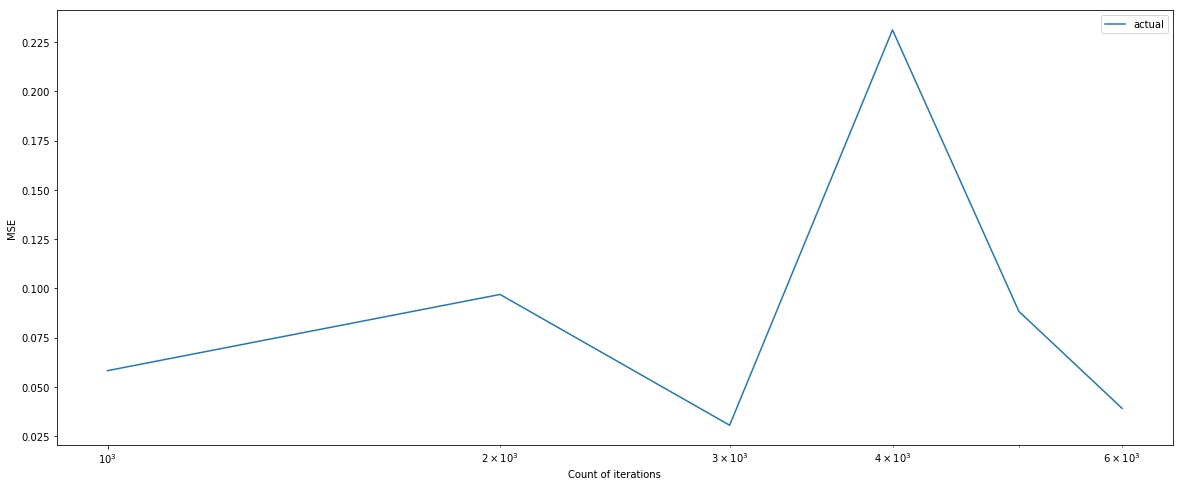

In [70]:
print(mse_differences_N)
getPlot(mse_differences_N[:-2])